# Lecture 08 - Trees, Forests and Ensembles

In [17]:
from IPython.display import display
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import (DecisionTreeClassifier, export_graphviz,\
                         plot_tree)
%matplotlib inline

In [6]:
cancer = load_breast_cancer()

# Parameters for train_test_split:
# *arrays: sequence of indexables with same length or shape[0]
#    Allowed inputs are lists, numpy arrays, scipy-sparse matrices
#    or pandas dataframes.
# test_size: float, int or None, optional (default=None)
#    If None, the values is set to the complement of the train size.
#    If `train_size` is also None, it will be set to 0.25.
# stratify: array-like or None (default=None)
#     If not None, data is split in a stratified fashion, using this
#     as the class labels.
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, 
    cancer.target,
    stratify=cancer.target,
    random_state=0
)

tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualizing trees with sklearn

[Text(279.0, 226.5, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(139.5, 135.9, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(69.75, 45.29999999999998, 'gini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(209.25, 45.29999999999998, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(418.5, 135.9, 'worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]'),
 Text(348.75, 45.29999999999998, 'gini = 0.497\nsamples = 37\nvalue = [20, 17]'),
 Text(488.25, 45.29999999999998, 'gini = 0.03\nsamples = 130\nvalue = [128, 2]')]

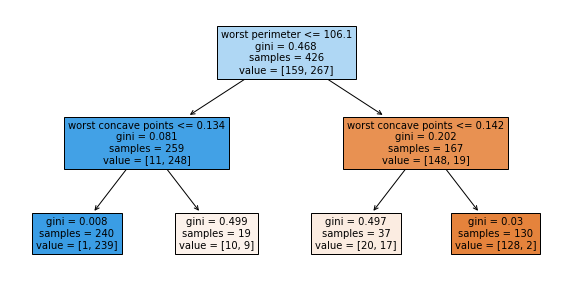

In [46]:
plt.figure(figsize=(10, 5))
tree_dot = plot_tree(tree, feature_names=cancer.feature_names, filled=True, fontsize=10)
display(tree_dot)

## Parameter Tuning
- Pre-pruning and post-pruning (not in sklearn yet)

[Text(521.8333333333334, 498.3, 'worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(186.0, 407.70000000000005, 'worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]'),
 Text(82.66666666666667, 317.1, 'area error <= 48.975\ngini = 0.008\nsamples = 240\nvalue = [1, 239]'),
 Text(41.333333333333336, 226.5, 'gini = 0.0\nsamples = 239\nvalue = [0, 239]'),
 Text(124.0, 226.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(289.33333333333337, 317.1, 'worst texture <= 26.0\ngini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(206.66666666666669, 226.5, 'worst smoothness <= 0.179\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(165.33333333333334, 135.89999999999998, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(248.0, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(372.0, 226.5, 'worst compactness <= 0.263\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(330.6666666666667, 135.89999999999998, 'mean radi

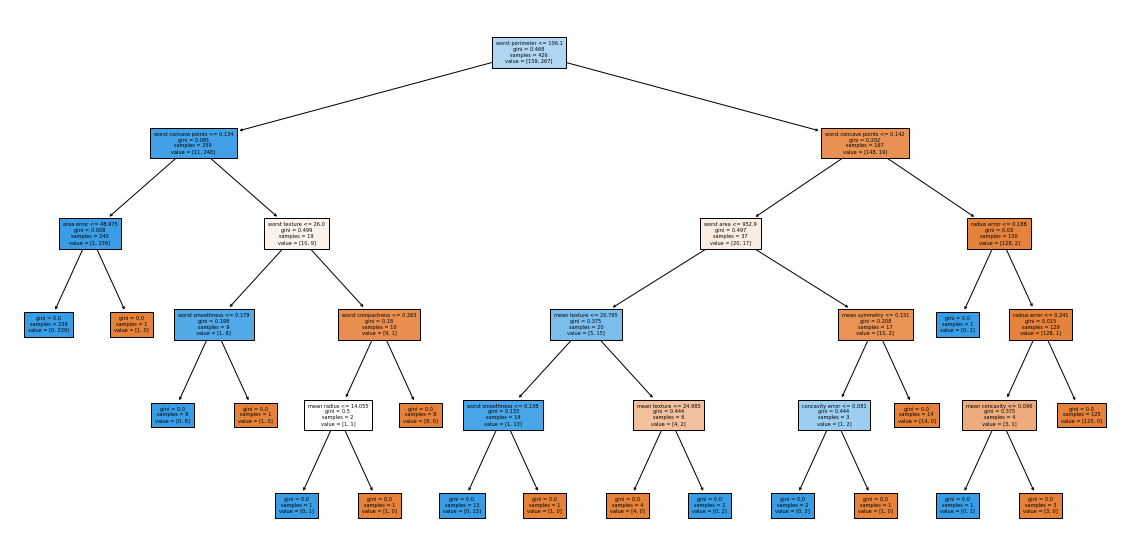

In [44]:
tree_no_prun = DecisionTreeClassifier()
tree_no_prun.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(tree_no_prun, feature_names=cancer.feature_names, filled=True, fontsize=5)